<a href="https://colab.research.google.com/github/KU-Gen-AI-2567/Autoencoder-demo/blob/main/Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Autoencoder - 01418496 (หมู่เรียน 200)

In [12]:
import tensorflow as tf
import matplotlib.pyplot as plt
import kagglehub
import shutil
import os
tf.__version__

'2.17.1'

In [13]:
import numpy as np
from PIL import Image

### Setting to execute on Processor (GPU or CPU)

In [14]:
gpus = tf.config.list_physical_devices("GPU")
if len(gpus) > 0:
    tf.config.experimental.set_memory_growth(gpus[0], True)
    print("Execute on GPU")
else:
    print("Execute on CPU")

Execute on CPU


### Download Dataset

In [15]:
# Download the dataset folder in latest version
if not "dataset" in os.listdir("."):
    path = kagglehub.dataset_download("tongpython/cat-and-dog/version/1")
    print("Path to dataset files:", path)
    shutil.move(path, "./dataset")
    print("Download Dataset Complete")
else:
    print("Download Dataset Already")

Download Dataset Already


## Prepossessing


In [16]:
dataset_path = "./dataset"
for dirpath, dirnames, filenames in os.walk(dataset_path):
    print(f"Path: {dirpath}, Subdirectories: {dirnames}, Files: {len(filenames)}")

Path: ./dataset, Subdirectories: ['test_set', 'training_set'], Files: 0
Path: ./dataset/test_set, Subdirectories: ['test_set'], Files: 0
Path: ./dataset/test_set/test_set, Subdirectories: ['cats', 'dogs'], Files: 0
Path: ./dataset/test_set/test_set/cats, Subdirectories: [], Files: 1012
Path: ./dataset/test_set/test_set/dogs, Subdirectories: [], Files: 1013
Path: ./dataset/training_set, Subdirectories: ['training_set'], Files: 0
Path: ./dataset/training_set/training_set, Subdirectories: ['cats', 'dogs'], Files: 0
Path: ./dataset/training_set/training_set/cats, Subdirectories: [], Files: 4001
Path: ./dataset/training_set/training_set/dogs, Subdirectories: [], Files: 4006


In [17]:
def preprocess(imgs):
    imgs = imgs.astype("float32") / 255.0  # Normalize pixel values to [0, 1]
    imgs = np.pad(imgs, ((0, 0), (2, 2), (2, 2), (0, 0)), constant_values=0.0)
    return imgs

def to_image(img):
    img = np.squeeze(img)
    return Image.fromarray(np.uint8(img * 255))

In [18]:
def dataset_to_numpy_and_preprocess(dataset):
    images, labels = [], []
    for img_batch, label_batch in dataset:
        images.append(img_batch.numpy())
        labels.append(label_batch.numpy())
    imgs = np.concatenate(images)
    lbls = np.concatenate(labels)
    return preprocess(imgs), lbls

In [19]:
train_dir = "./dataset/training_set/training_set"
test_dir = "./dataset/test_set/test_set"

In [20]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size=(100, 100),  # Resize images
    batch_size=32,
)

test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=(100, 100),
    batch_size=32,
)

X_train, y_train = dataset_to_numpy_and_preprocess(train_dataset)
X_test, y_test = dataset_to_numpy_and_preprocess(test_dataset)

Found 8005 files belonging to 2 classes.
Found 2023 files belonging to 2 classes.


In [21]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (8005, 104, 104, 3)
y_train shape: (8005,)
X_test shape: (2023, 104, 104, 3)
y_test shape: (2023,)


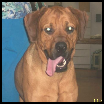

In [22]:
to_image(X_train[0])